<h1>Assignment 6</h1>

This is the entire Assignment 6. There is no theory part. When you're done, select "Restart and run all" in the Kernel menu, and make sure your code behaves as you expect. First, run the following code to import packages that we'll need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

<h2>1. Gaussian elimination</h2>
<h4>a.</h4>
Complete the following function to perform naive Gaussian elimination (no partial pivoting) on a matrix-vector pair $(A,\mathbf b)$. The algorithm should modify the entries of $A$ and $\mathbf b$ as it proceeds. If it encounters a pivot that is too small (absolute value less than 1e-14), return with <tt>err=j</tt> and any $(A,\mathbf b)$, where <tt>j</tt> is the Python index (starting at 0) of the too-small pivot. If the algorithm succeeds, return the new $(A,\mathbf b)$ pair with $A$ in upper triangular form, and <tt>err=-1</tt>.

In [2]:
def elim1(A,b):
    n = np.size(A,0)
    AA = np.copy(A)
    err = -1
    for j in range(0,n-1):
        if np.abs(AA[j][j])<1e-14:
            err = j
            break
        for i in range(j+1,n):
            mult = AA[i][j]/AA[j][j]
            for k in range(0 , n):
                AA[i][k] -= mult*AA[j][k]
            b[i] -= mult*b[j]
    # your code here

    return err , AA, b

# Test case: to activate it, change 0 to 1
if 0:
    A = np.array([[0,2,-1] , [2,1,-2] , [-3,1,1]])
    b = np.array([3,3,-6])
    print(A)
    err , Aa , bb = elim1(A,b)
    print(Aa,bb,err)

You should test your <tt>elim1</tt> function on some small examples where you know the answer. Make sure you test its peprformance in cases where zero pivots arise.

<h4>b.</h4>
Complete the following function that uses back substitution to solve $A\mathbf x=\mathbf b$. Assume the input $A$ is already in upper triangular form.

In [3]:
def back_sub(A,b):
    n = np.size(A,0)
    x = np.zeros(n)
    bb = np.copy(b)
    for i in range (n-1,-1,-1):
        for j in range(i+1,n):
            bb[i] -= A[i][j]*x[j]
        x[i] = bb[i]/A[i][i]
    return x
    # your code here

To test your <tt>elim1</tt> and <tt>back_sub</tt> functions in a case where no zero pivots arise, here is an $A$ matrix that I generated randomly, and a $\mathbf b$ vector defined by summing over the rows of $A$. The solution to $A\mathbf x=\mathbf b$ is an $\mathbf x$ vector will all 1 entries.

In [4]:
Atest = np.array([[ 0.79826903,  0.19868602,  0.05573054,  0.89532718,  0.5671893 ],
 [ 0.51797895,  0.65194623,  0.58542412,  0.28682017,  0.45166388],
 [ 0.60934362,  0.04260157,  0.26893151,  0.30455414,  0.8635352 ],
 [ 0.32003164,  0.01522154,  0.52904066,  0.65904292,  0.39232183],
 [ 0.03772914,  0.23077687,  0.30796316,  0.41365599,  0.32476244]])
b = np.sum(Atest,axis=1)
err, U, b = elim1(Atest,b)
x = back_sub(U,b)
print('x vector is:',x)

x vector is: [1. 1. 1. 1. 1.]


<h4>c.</h4>
Complete the following function, which improves on your function from part <b>a</b> by performing partial pivoting (i.e. row swaps) before eliminating each column. To find the row with the largest pivot, it might be convenient to use NumPy's <tt>argmax</tt> function.

In [5]:
def elim2(A,b):
    
    n = np.size(A,0)
    for k in range(n):
        for i in range(k+1,n):
            if (np.abs(A[i][k]) > np.abs(A[k][k])):
                A[[i,k]] = A[[k,i]]
                b[[i,k]] = b[[k,i]]
    for j in range(0,n-1):
        if np.abs(A[j][j]) < 1e-14:
            break;
        for i in range(j+1,n):
            mult = A[i][j]/A[j][j]
            for k in range(0 , n):
                A[i][k] -= mult*A[j][k]
            b[i] -= mult*b[j]
    # your code here

    return A, b

# Test case: to activate it, change 0 to 1
if 0:
    A = np.array([[0,2,3] , [2,1,-2] , [-3,1,1]])
    b = np.array([3,3,-6])
    print(A)
    Aa , bb = elim2(A,b)
    print(Aa,bb)
    

Test the correctness of your function on some cases where you know the answer, including a case where the <tt>elim1</tt> function would fail due to a zero pivot.

<h2>2. Condition numbers</h2>

<h4>a.</h4>
Complete the following functions to compute the $\Vert\cdot\Vert_\infty$ norm of a vector, the corresponding operator norm of a matrix, and the corresponding condition number of a matrix.

In [6]:
def norm_inf_vec(y):
    return np.linalg.norm(y, np.inf)
    # your code here
    
def norm_inf_mat(M):
    return np.linalg.norm(M, np.inf)
    # your code here

def cond_inf(M):
    # It works well enough to approximate the inverse using numpy's built-in function, even though
    # the resulting inverse is not accurate when the condition number is large.
    Minv = np.linalg.inv(M)
    return norm_inf_mat(M)*norm_inf_mat(Minv)

<h4>b.</h4>

In this course we have computed polynomials using the Lagrange construction, either in its original form or with the barycentric formula. I have said that it's not a good idea to construct the interpolating polynomial in the monomial basis. Let's see why. Suppose we want to find the constants $c_0,\ldots,c_{n-1}$ such that the polynomial $p(x)=c_0+x_1x+c_2x^2+\cdots+c_{n-1}x^{n-1}$ satisfies $p(x_i)=y_i$ at the $n$ interpolatin points $x_1,\ldots,x_n$. These conditions imply a linear system $A\mathbf c=\mathbf y$, where $\mathbf c = \begin{bmatrix}c_0&c_1&\cdots&c_{n-1}\end{bmatrix}^T$ and  $\mathbf y=\begin{bmatrix}y_1&y_2&\cdots&y_n\end{bmatrix}^T$. Derive a formula for the matrix $A$, and then complete the following function to construct this matrix.

In [7]:
def A_mono(xi):
    n = np.size(xi)
    # input: xi, an array of interpolation points
    # output: A, the matrix such that Ab=y, where y is the vector of yi values being interpolated
    A = np.zeros((n,n))
    for i in range (n):
        for j in range(n):
            A[i][j] = xi[i]**j
    return A
    # your code here


As a test of your <tt>A_mono</tt> function, the following code should compute and plot (using the monomial basis) a polynomial that interpolates $\sin x$ at interpolation points $x_i=-\pi,-\pi/2,0,\pi/2,\pi$.

[[  1.          -3.14159265   9.8696044  -31.00627668  97.40909103]
 [  1.          -1.57079633   2.4674011   -3.87578459   6.08806819]
 [  1.           0.           0.           0.           0.        ]
 [  1.           1.57079633   2.4674011    3.87578459   6.08806819]
 [  1.           3.14159265   9.8696044   31.00627668  97.40909103]]


[-4, 4, -2, 2]

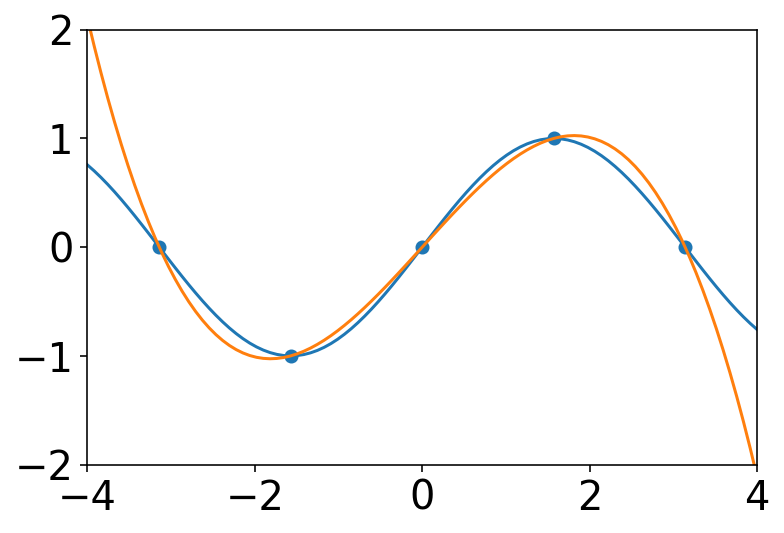

In [8]:
n = 5
xi = np.linspace(-np.pi,np.pi,n)
A = A_mono(xi)
print(A)
yi = np.sin(xi)
A, yi = elim2(A,yi)
c = back_sub(A,yi)

x = np.linspace(-4,4,100)
p = np.zeros(len(x))
for i in range(0,len(x)):
    p[i] = np.dot( c , np.power(x[i],np.linspace(0,n-1,n)) )

plt.figure()
plt.plot(x,np.sin(x))
plt.scatter(xi,np.sin(xi))
plt.plot(x,p)
plt.axis([-4,4,-2,2])

<h4>c.</h4>

Let the $n$ interpolation points $x_1,\ldots,x_n$ be uniformly spaced from $-1$ to $1$. Suppose we want to solve the equation $A\mathbf c=\mathbf y$ to find the $c_0,\ldots,c_{n-1}$ needed to represent $p(x)$ in the monomial basis. Using the functions you wrote in parts <b>a</b> and <b>b</b>, compute $cond(A)$ for $n=5,10,\ldots,35,40$. Plot $cond(A)$ on a logarithmic axis versus $n$ on a linear axis.

Text(0, 0.5, 'Cond(A)')

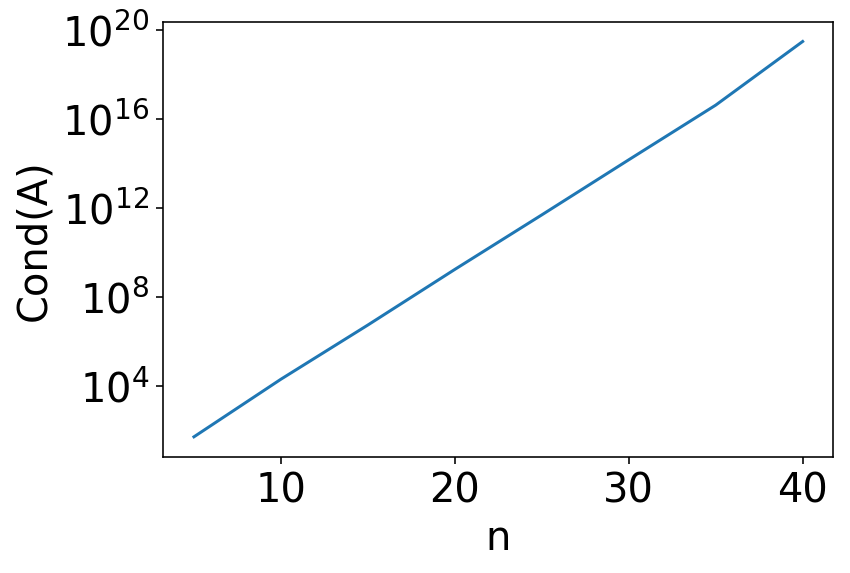

In [9]:

nn = [5,10,15,20,25,30,35,40]
y = []
for n in nn:
    x = np.linspace(-1,1,n)
    A = A_mono(x)
    y.append(cond_inf(A))
plt.figure()
#plt.xscale('log')
plt.yscale('log')
plt.plot(nn,y)
plt.xlabel('n')
plt.ylabel('Cond(A)')





<h4>d.</h4>

Repeat part <b>c</b> using Chebyshev nodes of the first kind for the $n$ interpolation points (but still assuming we want to find the $c_i$ to to construct $p(x)$ in the monomial basis). You should find that this helps a little but isn't nearly enough to fix the problem.

Text(0, 0.5, 'Cond(A)')

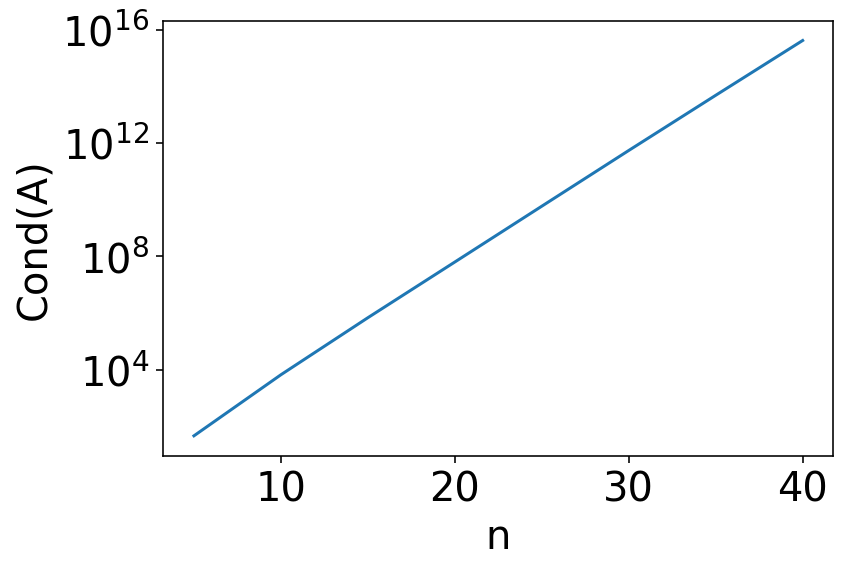

In [10]:
def cheb_nodes1(n):
    return np.cos( np.linspace(1/(2*n)*np.pi,(2*n-1)/(2*n)*np.pi,n) )
nn = [5,10,15,20,25,30,35,40]
y = []
for n in nn:
    x = cheb_nodes1(n)
    A = A_mono(x)
    y.append(cond_inf(A))
plt.figure()
#plt.xscale('log')
plt.yscale('log')
plt.plot(nn,y)
plt.xlabel('n')
plt.ylabel('Cond(A)')

<h2>3. LU decomposition</h2>

<h4>a.</h4>
Complete the following function to compute an LU decomposition <i>without</i> partial pivoting. (You can assume that you won't run into any pivots that are too small.) You can do this by modifying your <tt>elim1</tt> function. Return a single matrix whose diagonal and above-diagonal entries are the entries of $U$ and whose below-diagonal entries are the below-diagonal entries of $L$.

In [11]:
def LU(A):
    n = np.size(A,0)
    U = np.copy(A)
    L = np.zeros((n,n))
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = U[i][j]/U[j][j]
            L[i][j] += mult
            for k in range(0 , n):
                U[i][k] -= mult*U[j][k]
    return U + L


Test your code on a simple example where you know the LU decomposition.

<h4>b.</h4>
Complete the following function whose input is a single matrix encoding the LU decomposition (as output by your <tt>LU</tt> function) and a $\mathbf b$ vector. It should perform two back substitution operations and output the solution to $A\mathbf x=\mathbf b$.

In [12]:
def LU_sub(M,b):
    L = np.tril(M,-1)
    np.fill_diagonal(L,1)
    U = np.triu(M)
    n = np.size(M,0)
    x = np.zeros(n)
    y = np.zeros(n)
    bb = np.copy(b)
    for i in range (n):
        for j in range(i):
            bb[i] -= L[i][j]*y[j]
        y[i] = bb[i]/L[i][i]

    for i in range (n-1,-1,-1):
        for j in range(i+1,n):
            y[i] -= U[i][j]*x[j]
        x[i] = y[i]/U[i][i]

    return x
    # your code here

To test your functions, the following code should solve the same test problem from part <b>1b</b>, but it should do so using the LU decomposition.

In [13]:
A_LU = LU(Atest)
b = np.sum(Atest,axis=1)
x = LU_sub(A_LU,b)
print('x vector is:',x)

x vector is: [1. 1. 1. 1. 1.]


<h2>4. Newton's method</h2>

<h4>a.</h4>
For the following system of nonlinear equations, implement a function whose input is an initial guess $(u_0,v_0)$ and whose output is an approximate root, computed using the multivariable Newton's method.
$$ u^3-3uv^2-1=0, \quad -v^3+3u^2v=0. $$
Make sure your iterate enough times for your answer to be well converged.

In [14]:
def DF(u,v):
    D = np.array([[3*u*u - 3*v*v , -6*v*u],[6*u*v , 3*u*u - 3*v*v]])
    return D
def f1(u,v):
    return u**3 - 3*u*v*v-1
def f2(u,v):
    return -1*v**3 + 3*u*u*v

def newt2d(u0,v0):
    x = f1(u0,v0)
    y = f2(u0,v0)
    b = np.array([[-1.*x],[-1.*y]])
    U,b = elim2(DF(u0,v0),b)
    s = back_sub(U,b)
    u1 = u0 + s[0]
    v1 = v0 + s[1]
    while (np.abs(u1-u0) >= 1e-14 or np.abs(v1-v0) >= 1e-14):
        u0 = u1
        v0 = v1
        x = f1(u0,v0)
        y = f2(u0,v0)
        b = np.array([[-1.*x],[-1.*y]])
        U,b = elim2(DF(u0,v0),b)
        s = back_sub(U,b)
        u1 = u0 + s[0]
        v1 = v0 + s[1]

        
    
    # your code here

    return u1, v1    

Find three pairs of initial conditions that converge to three different roots $(u,v)$.

Assign the following variables to record the three roots. Order your answers so that v1<v2<v3.

In [15]:
u1, v1 = newt2d(-1,-1)
u2, v2 = newt2d(2,1)
u3, v3 = newt2d(-1,1)
print (u1,v1)
print(u2,v2)
print (u3,v3)

-0.5 -0.8660254037844387
1.0 0.0
-0.5 0.8660254037844387


<h4>b.</h4>
Consider the following possible values for initial guesses.

In [16]:
u_init = np.linspace(-1.5,1,70)
v_init = np.linspace(-1.5,1.5,70)

Let's examine how the intial guess $(u_0,v_0)$ affects which of the three roots Newton's method converges to. For each of the $70^2$ possible pairs of the above initial guesses, execute your function from part 4a to find a root. Plot each initial condition $(u_0,v_0)$ as a point in the $u-v$ plane. Color the point either red, blue, or green depending on which of the three roots Newton's method converged to (within some small distance). The exact picture is a fractal, so you are only producing a rough approximation of it.

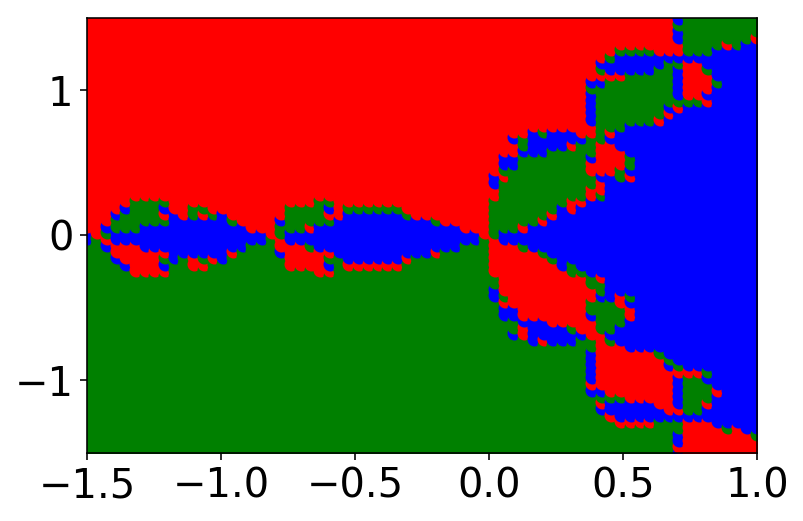

In [17]:
for i in u_init:
    for j in v_init:
        u,v = newt2d(i,j)
        if (np.abs(v-v1)<1e-8):
            plt.scatter(i,j,color='green')
        elif (np.abs(v-v2)<1e-8):
            plt.scatter(i,j,color='blue')
        else:
            plt.scatter(i,j,color='red')
plt.axis([-1.5,1,-1.5,1.5])
plt.show()